# Pneumonia Detection Using CNN

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os


In [6]:
# Description of the Pneumonia Dataset
print("""
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal).
There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Chest X-ray images (anterior-posterior) were selected
from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou.
""")



The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal).
There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Chest X-ray images (anterior-posterior) were selected
from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou.



In [7]:
# Defineing labels and image size
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

# Function to load and preprocess images
def get_training_data(data_dir):
    data = []
    labels = []
    for label in ['PNEUMONIA', 'NORMAL']:
        path = os.path.join(data_dir, label)
        class_num = ['PNEUMONIA', 'NORMAL'].index(label)  # Assign class index
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshape images
                data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image: {e}")
    return np.array(data), np.array(labels)


In [8]:
train_dir = r"C:\Users\SAMSUNG\Downloads\archive\chest_xray\train"
test_dir = r"C:\Users\SAMSUNG\Downloads\archive\chest_xray\test"
val_dir = r"C:\Users\SAMSUNG\Downloads\archive\chest_xray\val"

x_train, y_train = get_training_data(train_dir)
x_test, y_test = get_training_data(test_dir)
x_val, y_val = get_training_data(val_dir)

x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

x_train = x_train.reshape(-1, 150, 150, 1)
x_test = x_test.reshape(-1, 150, 150, 1)
x_val = x_val.reshape(-1, 150, 150, 1)


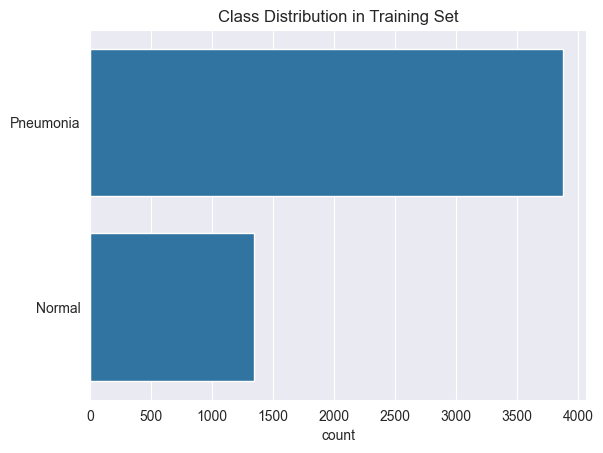

In [5]:
# Checking class distribution in training set
labels_count = ['Pneumonia' if label == 0 else 'Normal' for label in y_train]

sns.set_style('darkgrid')
sns.countplot(labels_count)
plt.title("Class Distribution in Training Set")
plt.show()


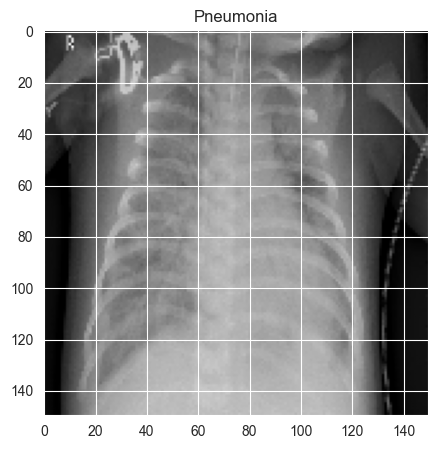

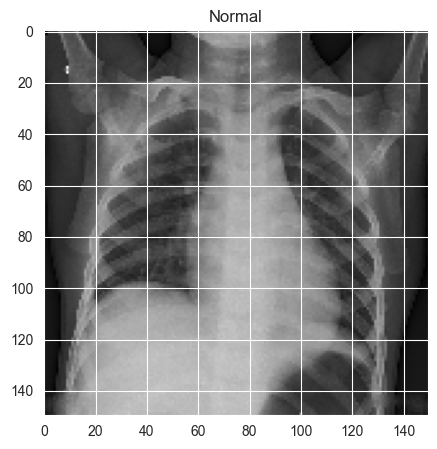

In [6]:
# Displaying example images from each class
plt.figure(figsize=(5, 5))
plt.imshow(x_train[0].reshape(img_size, img_size), cmap='gray')
plt.title("Pneumonia" if y_train[0] == 0 else "Normal")

plt.figure(figsize=(5, 5))
plt.imshow(x_train[-1].reshape(img_size, img_size), cmap='gray')
plt.title("Pneumonia" if y_train[-1] == 0 else "Normal")
plt.show()


In [7]:
# Data augmentation to increase variability
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [8]:
# Defineing the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [9]:
# Training the model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=1e-6)

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=12,
                    validation_data=(x_val, y_val),
                    callbacks=[learning_rate_reduction])


C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 718ms/step - accuracy: 0.7942 - loss: 1.2056 - val_accuracy: 0.5000 - val_loss: 27.9680 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 799ms/step - accuracy: 0.9033 - loss: 0.2539 - val_accuracy: 0.5000 - val_loss: 31.9463 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.9228 - loss: 0.2160
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 785ms/step - accuracy: 0.9228 - loss: 0.2160 - val_accuracy: 0.5000 - val_loss: 11.2755 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 728ms/step - accuracy: 0.9468 - loss: 0.1546 - val_accuracy: 0.8750 - val_loss: 0.3680 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 738ms/step - accuracy: 0.9466 - loss: 0.1388 - val_accuracy: 0.6250 - val_loss: 3.4376 - learning_rate: 3.0000e-04
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - 

In [10]:
# Evaluateing the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7825 - loss: 0.5304
Loss: 0.4283
Accuracy: 81.89%


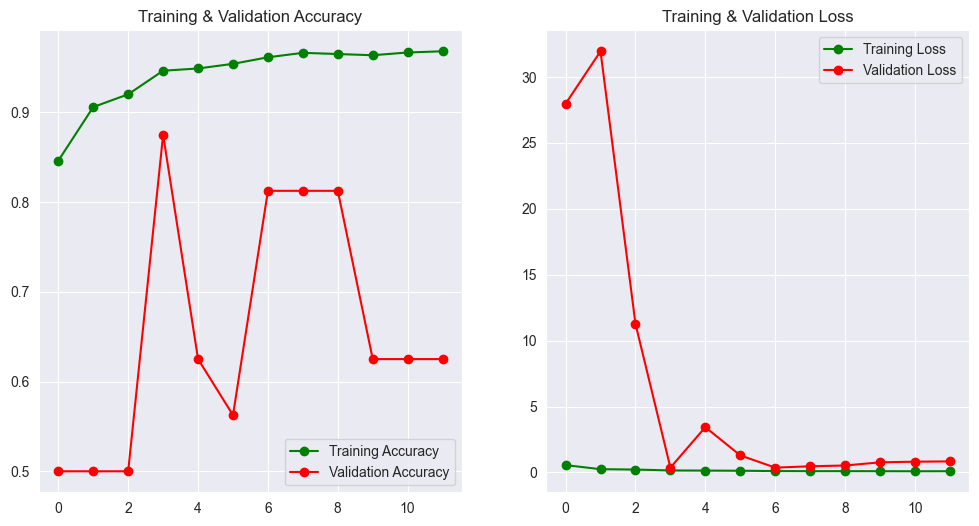

In [11]:
# Visualize training and validation performance
epochs = range(len(history.history['accuracy']))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'go-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'go-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
              precision    recall  f1-score   support

   Pneumonia       0.97      0.73      0.83       390
      Normal       0.68      0.97      0.80       234

    accuracy                           0.82       624
   macro avg       0.83      0.85      0.82       624
weighted avg       0.86      0.82      0.82       624



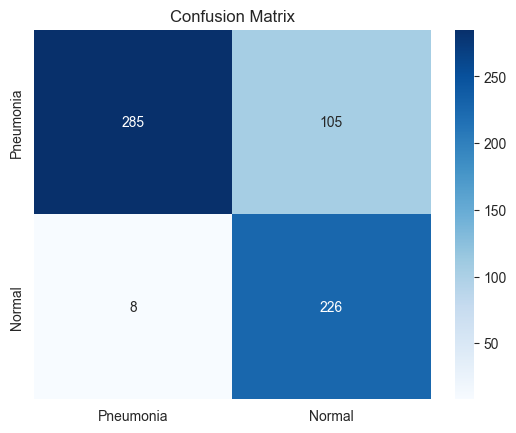

In [12]:
# Analyzeing model predictions
predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int).reshape(-1)

# Classification report
print(classification_report(y_test, predictions, target_names=['Pneumonia', 'Normal']))

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pneumonia', 'Normal'], yticklabels=['Pneumonia', 'Normal'])
plt.title("Confusion Matrix")
plt.show()


# Data Preprocessing and Model Setup for Pneumonia Detection

In [13]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Ensureing GPU support if available
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


TensorFlow version: 2.18.0
GPU is NOT AVAILABLE


In [14]:
# Set image size
IMG_SIZE = 150

# Paths to dataset
TRAIN_DIR =r"C:\Users\SAMSUNG\Downloads\archive\chest_xray\train"
TEST_DIR = r"C:\Users\SAMSUNG\Downloads\archive\chest_xray\test"
VAL_DIR = r"C:\Users\SAMSUNG\Downloads\archive\chest_xray\val"

In [15]:
# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


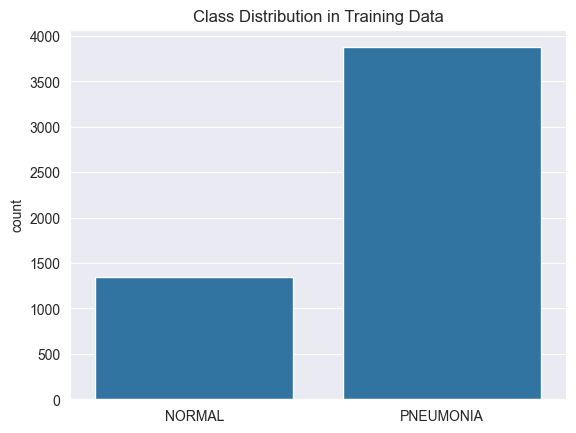

In [16]:
# Visualize the class distribution
train_classes = [key for key, val in train_generator.class_indices.items()]
train_labels = train_generator.labels
sns.countplot(x=train_labels)
plt.xticks(range(len(train_classes)), train_classes)
plt.title("Class Distribution in Training Data")
plt.show()


In [17]:
# Loading Pre-trained MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
last_output = base_model.output


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_33044\870528820.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),


In [18]:
# Adding custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=x)


In [19]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 75, 75, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 75, 75, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 75, 75, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 75, 75, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 75, 75, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 75, 75, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 75, 75, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 75, 75, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 77, 77, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 38, 38, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,570,753 (13.62 MB)

 Trainable params: 1,312,769 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [20]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[callback])


C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 531ms/step - accuracy: 0.8066 - loss: 0.4815 - val_accuracy: 0.7500 - val_loss: 0.5296
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 549ms/step - accuracy: 0.9080 - loss: 0.2219 - val_accuracy: 0.7500 - val_loss: 0.4299
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 541ms/step - accuracy: 0.9182 - loss: 0.2002 - val_accuracy: 0.7500 - val_loss: 0.4781
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 526ms/step - accuracy: 0.9254 - loss: 0.1856 - val_accuracy: 0.8125 - val_loss: 0.3777
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 525ms/step - accuracy: 0.9153 - loss: 0.1969 - val_accuracy: 0.7500 - val_loss: 0.4802
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 534ms/step - accuracy: 0.9342 - loss: 0.1689 - val_accuracy: 0.8125 - val_loss: 0.3997
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 499ms/step - accuracy: 0.9273 - loss: 0.1756 - val_accuracy: 0.7500 - val_loss: 0.5566


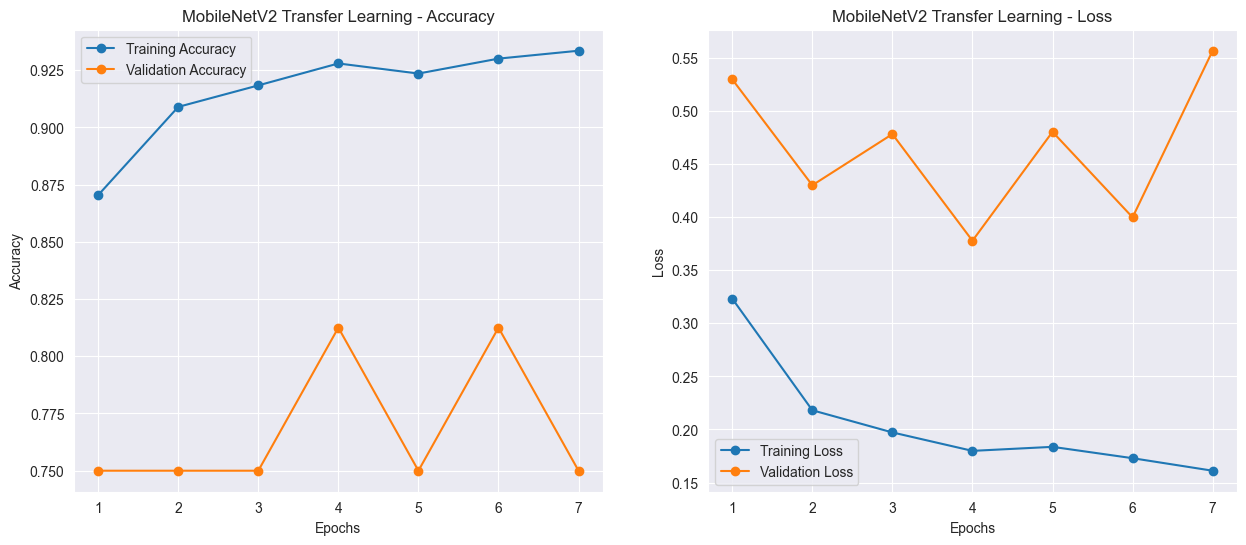

In [21]:
# Plot Training and Validation Accuracy and Loss
def vis_evaluation(history_dict, model_name):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    epochs = range(1, len(history_dict['accuracy']) + 1)

    axs[0].plot(epochs, history_dict['accuracy'], label='Training Accuracy', marker='o')
    axs[0].plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy', marker='o')
    axs[0].set_title(f"{model_name} - Accuracy")
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    axs[1].plot(epochs, history_dict['loss'], label='Training Loss', marker='o')
    axs[1].plot(epochs, history_dict['val_loss'], label='Validation Loss', marker='o')
    axs[1].set_title(f"{model_name} - Loss")
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

# Visualize training performance
vis_evaluation(history.history, "MobileNetV2 Transfer Learning")


In [22]:
# Fine-tune the model
base_model.trainable = True
fine_tune_at = 100  # Unfreeze layers from here
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile with a smaller learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune training
history_fine = model.fit(train_generator,
                         epochs=15,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_generator)


Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 725ms/step - accuracy: 0.9077 - loss: 0.2736 - val_accuracy: 0.5000 - val_loss: 10.0997
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 845ms/step - accuracy: 0.9516 - loss: 0.1305 - val_accuracy: 0.5000 - val_loss: 10.9368
Epoch 9/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.9587 - loss: 0.1018 - val_accuracy: 0.5000 - val_loss: 6.6550
Epoch 10/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9707 - loss: 0.0807 - val_accuracy: 0.5000 - val_loss: 6.5803
Epoch 11/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.9678 - loss: 0.0797 - val_accuracy: 0.5000 - val_loss: 5.5867
Epoch 12/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 132s 806ms/step - accuracy: 0.9736 - loss: 0.0714 - val_accuracy: 0.6875 - val_loss: 1.1760
Epoch 13/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 749ms/step - accuracy: 0.9746 - loss: 0.0685 - val_accuracy: 0.5000 - val_loss: 3.0211
Epoch 14/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 696ms/step - accuracy: 0.9813 - l

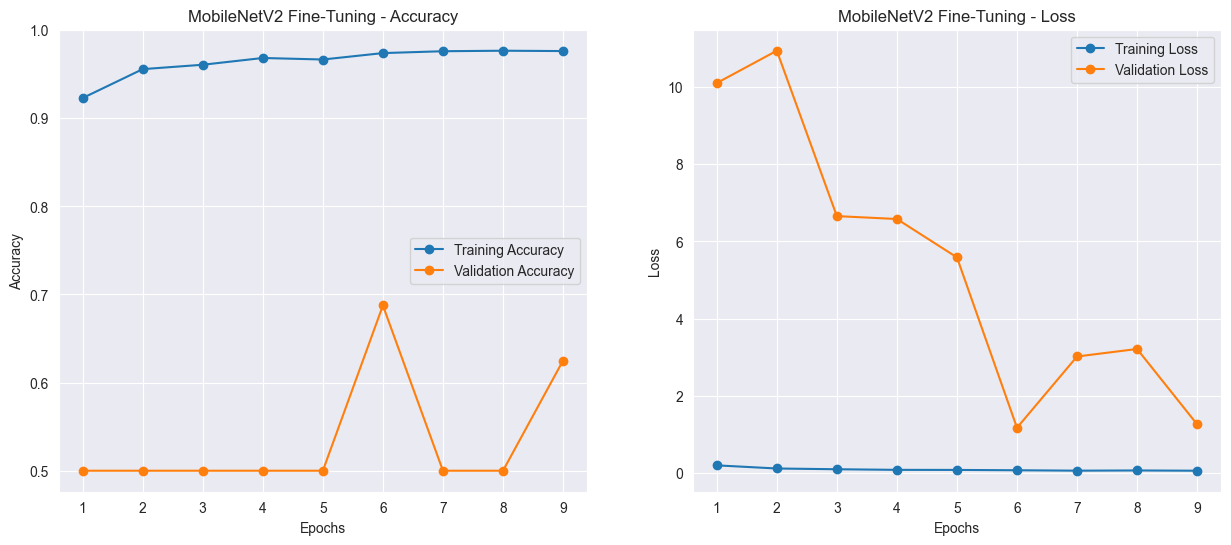

In [23]:
# Visualize fine-tuned performance
vis_evaluation(history_fine.history, "MobileNetV2 Fine-Tuning")


In [24]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 865ms/step - accuracy: 0.6580 - loss: 1.4478
Test Loss: 0.8488962054252625
Test Accuracy: 80.13%


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step
              precision    recall  f1-score   support

      NORMAL       0.98      0.48      0.64       234
   PNEUMONIA       0.76      0.99      0.86       390

    accuracy                           0.80       624
   macro avg       0.87      0.74      0.75       624
weighted avg       0.84      0.80      0.78       624



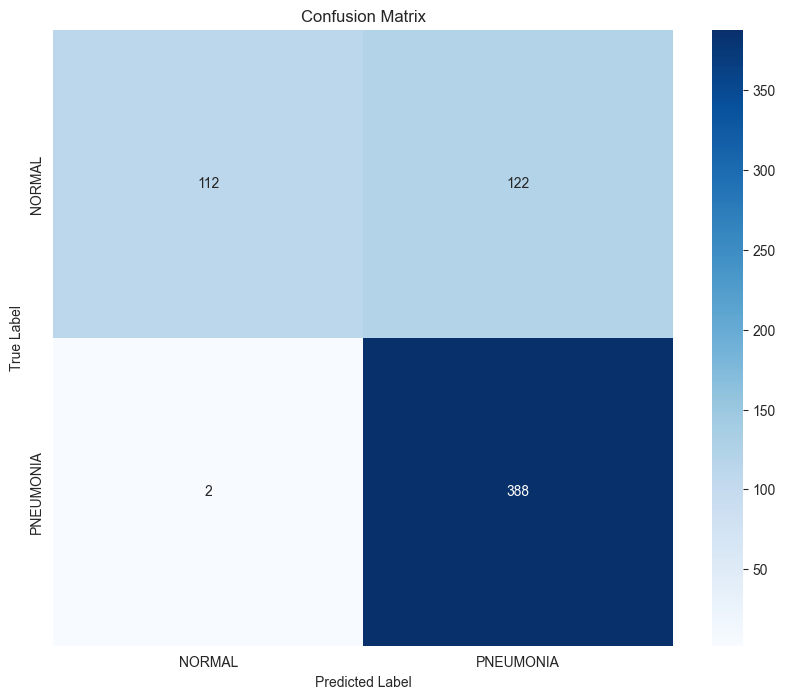

In [25]:
# Confusion matrix and classification report
predictions = (model.predict(test_generator) > 0.5).astype("int32").flatten()
true_labels = test_generator.classes
cm = confusion_matrix(true_labels, predictions)
print(classification_report(true_labels, predictions, target_names=test_generator.class_indices.keys()))

# Visualize confusion matrix
cm_df = pd.DataFrame(cm, index=train_classes, columns=train_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [26]:
from tensorflow.keras.datasets import imdb

# Load IMDb dataset with top 10,000 most frequent words
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Train Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)
print("Example Review:", x_train[0])


Train Data Shape: (25000,)
Test Data Shape: (25000,)
Example Review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure consistent input size
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

print("Padded Train Shape:", x_train.shape)
print("Padded Test Shape:", x_test.shape)



Padded Train Shape: (25000, 200)
Padded Test Shape: (25000, 200)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6725 - loss: 0.5663 - val_accuracy: 0.8526 - val_loss: 0.3468
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9755 - loss: 0.0832 - val_accuracy: 0.8412 - val_loss: 0.4661
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9982 - loss: 0.0094 - val_accuracy: 0.8468 - val_loss: 0.5354
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.8478 - val_loss: 0.5769
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 1.0000 - loss: 2.5580e-04 - val_accuracy: 0.8498 - val_loss: 0.5912


In [30]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8415 - loss: 0.6113
Test Loss: 0.6169099807739258
Test Accuracy: 84.12%


# Sentiment Analysis Using IMDb Dataset

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [32]:
# Load IMDb dataset
from tensorflow.keras.datasets import imdb

# Use top 10,000 most frequent words
num_words = 10000

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Data Preview
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Sample Review (encoded): {x_train[0]}")
print(f"Sample Label: {y_train[0]}")


Training data shape: (25000,)
Test data shape: (25000,)
Sample Review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16

In [33]:
# Set maximum review length and pad sequences
max_len = 100

x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

print(f"Padded Training data shape: {x_train.shape}")
print(f"Padded Test data shape: {x_test.shape}")


Padded Training data shape: (25000, 100)
Padded Test data shape: (25000, 100)


In [34]:
# Build a simple feedforward network
model_ff = Sequential([
    Embedding(num_words, 32, input_length=max_len),  # Word Embeddings
    tf.keras.layers.Flatten(),  # Flatten the embeddings
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_ff.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model_ff.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6713 - loss: 0.5708 - val_accuracy: 0.8340 - val_loss: 0.3766
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9413 - loss: 0.1616 - val_accuracy: 0.8200 - val_loss: 0.4513
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9942 - loss: 0.0246 - val_accuracy: 0.8240 - val_loss: 0.6343
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9998 - loss: 0.0030 - val_accuracy: 0.8242 - val_loss: 0.7075
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8260 - val_loss: 0.7617


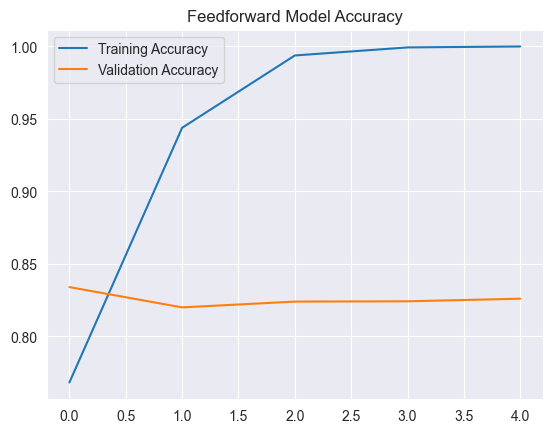

In [35]:
# Train the model
history_ff = model_ff.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

# Plot training history
plt.plot(history_ff.history['accuracy'], label='Training Accuracy')
plt.plot(history_ff.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Feedforward Model Accuracy")
plt.show()


In [36]:
# Evaluate the model
loss, accuracy = model_ff.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8241 - loss: 0.7752
Test Accuracy: 82.44%


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 86ms/step - accuracy: 0.6783 - loss: 0.5735 - val_accuracy: 0.8206 - val_loss: 0.4034
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8866 - loss: 0.2983 - val_accuracy: 0.8322 - val_loss: 0.3698
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.9180 - loss: 0.2220 - val_accuracy: 0.8278 - val_loss: 0.4247
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.9481 - loss: 0.1500 - val_accuracy: 0.8380 - val_loss: 0.4439
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9655 - loss: 0.1075 - val_accuracy: 0.8306 - val_loss: 0.5221


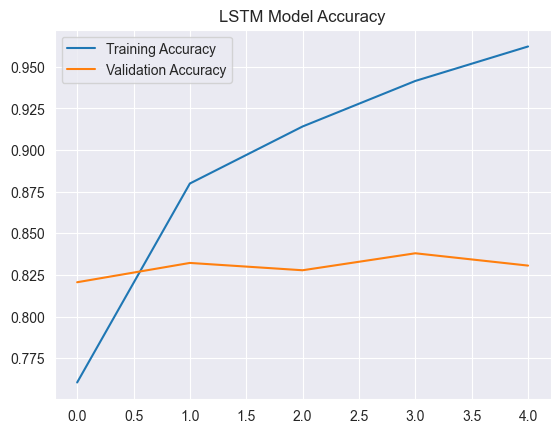

In [37]:
# Build an LSTM-based model
model_lstm = Sequential([
    Embedding(num_words, 64, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

# Plot training history
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("LSTM Model Accuracy")
plt.show()


In [38]:
# Evaluate the LSTM model
loss, accuracy = model_lstm.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8304 - loss: 0.5244
Test Accuracy: 83.19%


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step


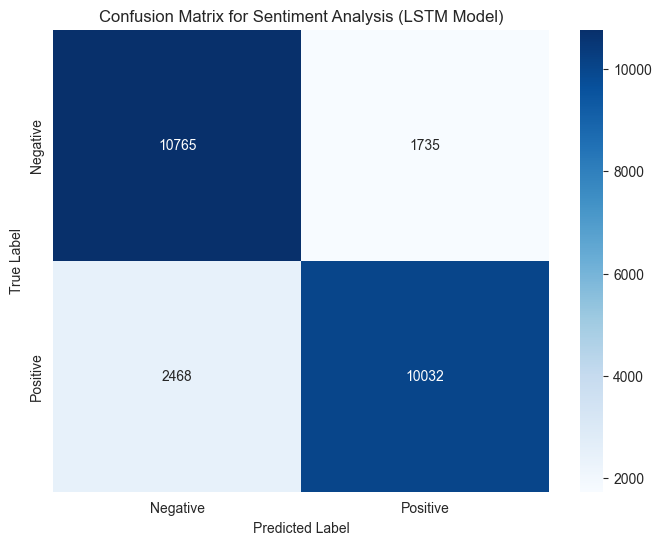

Classification Report for Sentiment Analysis (LSTM Model):
              precision    recall  f1-score   support

    Negative       0.81      0.86      0.84     12500
    Positive       0.85      0.80      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate predictions from the LSTM model
predictions = (model_lstm.predict(x_test) > 0.5).astype("int32").flatten()

# True labels
true_labels = y_test

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Convert confusion matrix to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Sentiment Analysis (LSTM Model)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Print classification report
print("Classification Report for Sentiment Analysis (LSTM Model):")
print(classification_report(true_labels, predictions, target_names=['Negative', 'Positive']))
